In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [3]:
data=r"D:\project\CODE\data"
import os
for file in os.listdir(data):
    print(file)

Accident
No Accident


In [26]:
Categories=['Accident','No Accident'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir=r"D:\project\CODE\data"

#path which contains all the categories of images 
for i in Categories: 
	
	print(f'loading... category : {i}') 
	path=os.path.join(datadir,i) 
	for img in os.listdir(path): 
		img_array=imread(os.path.join(path,img)) 
		img_resized=resize(img_array,(100,100,3)) 
		flat_data_arr.append(img_resized.flatten()) 
		target_arr.append(Categories.index(i)) 
	print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : Accident
loaded category:Accident successfully
loading... category : No Accident
loaded category:No Accident successfully


In [27]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape

(526, 30001)

In [28]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]


In [29]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
											random_state=77) 

In [30]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

In [31]:
# Training the model using the training data 
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [32]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")



The model is 97.16981132075472% accurate


In [33]:
# Display the best parameters found during the grid search
print("Best parameters:", model.best_params_)

Best parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [34]:
# Save the trained model
import joblib
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.97      1.00      0.98        98

    accuracy                           0.97       106
   macro avg       0.99      0.81      0.88       106
weighted avg       0.97      0.97      0.97       106



In [36]:
import h5py
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [37]:
# Save the trained model in HDF5 format
with h5py.File('svm_model.h5', 'w') as hdf:
    for key in model.best_estimator_.__dict__:
        if isinstance(model.best_estimator_.__dict__[key], str):
            hdf.create_dataset(key, data=model.best_estimator_.__dict__[key])

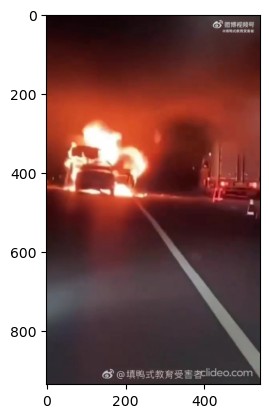

Accident = 94.05984129683415%
No Accident = 5.9401587031658325%
The predicted image is : Accident


In [41]:
path=r'D:\project\CODE\data\Accident\1(132).jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(100,100,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])